<a href="https://colab.research.google.com/github/danaSror/mask-classifier/blob/main/mask_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Create an image classifier that can identify if a person in the image wears a facial mask**
With evaluation of the classifier precision.

In [ ]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"danasror","key":"83f2d5cd8d8b7d0c9848067dc056909f"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/masks

!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset -p ./datasets/masks/
!mkdir ./datasets/masks/photos
!unzip ./datasets/masks/*.zip  -d ./datasets/masks/photos

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: ./datasets/m

In [ ]:
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.0 MB 21 kB/s 
     |████████████████████████████████| 86.4 MB 86 kB/s 
     |████████████████████████████████| 322 kB 57.2 MB/s 
     |████████████████████████████████| 3.5 MB 47.9 MB/s 
     |████████████████████████████████| 3.6 MB 54.3 MB/s 
     |████████████████████████████████| 18.3 MB 515 kB/s 
     |████████████████████████████████| 449 kB 73.6 MB/s 
     |████████████████████████████████| 2.9 MB 58.5 MB/s 
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 20.1 MB 891 kB/s 
     |████████████████████████████████| 3.8 MB 63.0 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=f1bcce3e57b40d43b60ea65293509c8d18565d3d7be8ebd2076c62714383da35
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6


In [ ]:
import turicreate as tc
DATASET_PATH = "./datasets/masks/photos/"

test_data = tc.image_analysis.load_images(f"{DATASET_PATH}/Face Mask Dataset/Test/", with_path=True)
train_data = tc.image_analysis.load_images(f"{DATASET_PATH}/Face Mask Dataset/Train/", with_path=True)
train_data

path,image
/content/datasets/masks/photos/Face Mask Datas ...,Height: 82 Width: 82
/content/datasets/masks/photos/Face Mask Datas ...,Height: 25 Width: 25
/content/datasets/masks/photos/Face Mask Datas ...,Height: 50 Width: 50
/content/datasets/masks/photos/Face Mask Datas ...,Height: 53 Width: 53
/content/datasets/masks/photos/Face Mask Datas ...,Height: 37 Width: 37
/content/datasets/masks/photos/Face Mask Datas ...,Height: 78 Width: 78
/content/datasets/masks/photos/Face Mask Datas ...,Height: 116 Width: 116
/content/datasets/masks/photos/Face Mask Datas ...,Height: 32 Width: 32
/content/datasets/masks/photos/Face Mask Datas ...,Height: 57 Width: 57
/content/datasets/masks/photos/Face Mask Datas ...,Height: 56 Width: 56


/usr/local/lib/python3.7/dist-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,path,image
0,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/10.png,
1,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/100.png,
2,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1004.png,
3,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1005.png,
4,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1006.png,
5,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1007.png,
6,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1008.png,
7,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1011.png,
8,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1012.png,
9,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1018.png,

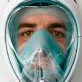
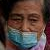
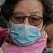
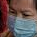
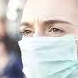
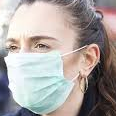
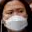
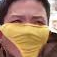
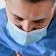
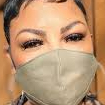
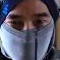
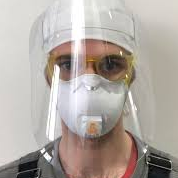
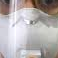
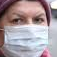
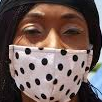
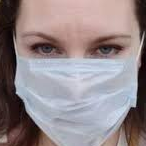
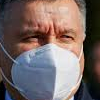
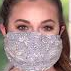
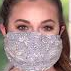
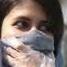
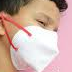
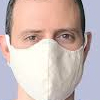
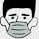
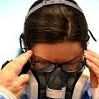
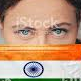
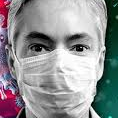
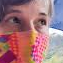
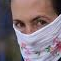
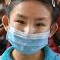
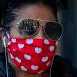
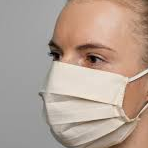
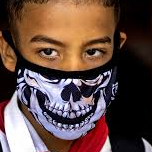
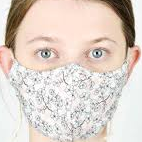
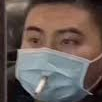
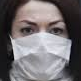
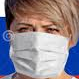
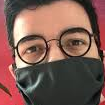
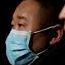
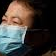
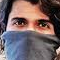
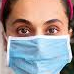
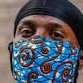
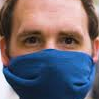
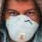
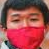
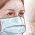
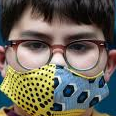
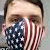
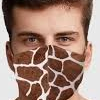
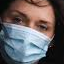
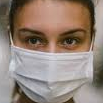
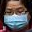
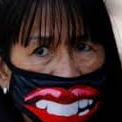
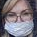
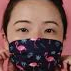
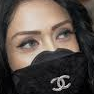
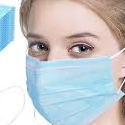
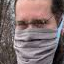
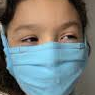
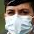
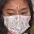
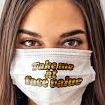
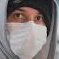
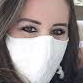
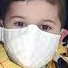
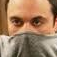
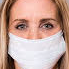
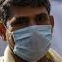
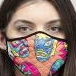
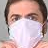
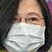
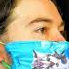
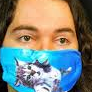
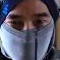
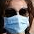
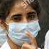
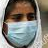
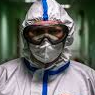
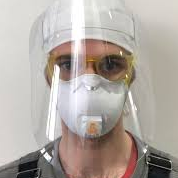
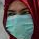
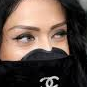
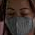
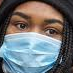
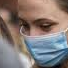
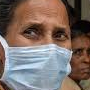
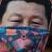
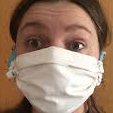
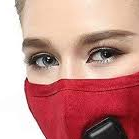
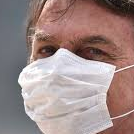
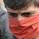
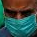
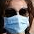

In [ ]:
train_data.explore()

In [ ]:
test_data['class'] = test_data['path'].apply(lambda p: p.split('/')[-2])
train_data['class'] = train_data['path'].apply(lambda p: p.split('/')[-2])
train_data

path,image,class
/content/datasets/masks/photos/Face Mask Datas ...,Height: 82 Width: 82,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 25 Width: 25,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 50 Width: 50,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 53 Width: 53,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 37 Width: 37,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 78 Width: 78,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 116 Width: 116,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 32 Width: 32,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 57 Width: 57,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 56 Width: 56,WithMask


In [ ]:
cls = tc.image_classifier.create(train_data, target='class')

Download completed: /var/tmp/model_cache/resnet-50-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed    64/10000
Completed   128/10000
Completed   192/10000
Completed   256/10000
Completed   320/10000
Completed   384/10000
Completed   448/10000
Completed   512/10000
Completed   576/10000
Completed   640/10000
Completed   704/10000
Completed   768/10000
Completed   832/10000
Completed   896/10000
Completed   960/10000
Completed  1024/10000
Completed  1088/10000
Completed  1152/10000
Completed  1216/10000
Completed  1280/10000
Completed  1344/10000
Completed  1408/10000
Completed  1472/10000
Completed  1536/10000
Completed  1600/10000
Completed  1664/10000
Completed  1728/10000
Completed  1792/10000
Completed  1856/10000
Completed  1920/10000
Completed  1984/10000
Completed  2048/10000
Completed  2112/10000
Completed  2176/10000
Completed  2240/10000
Completed  2304/10000
Completed  2368/10000
Completed  2432/10000
Completed  2496/10000
Completed  2560/10000


Logistic regression:

--------------------------------------------------------

Number of examples          : 9500

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.023220  | 3.207327     | 0.565474          | 0.570000            |

| 1         | 10       | 0.487621  | 5.285874     | 0.916737          | 0.896000            |

| 2         | 12       | 0.487621  | 7.495716     | 0.974421          | 0.976000            |

| 3         | 14       | 0.487621  | 9.984699     | 0.986632          | 0.990000            |

| 4         | 16       | 0.487621  | 12.357780    | 0.991053          | 0.998000            |

| 9         | 26       | 0.487621  | 20.995117    | 0.994632          | 0.998000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
test_data["preds"] = cls.predict(test_data)
test_data["preds"]

dtype: str
Rows: 992
['WithoutMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'Wi

In [ ]:
test_data['class']

dtype: str
Rows: 992
['WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithM

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data['class']),list(test_data["preds"]),digits=4))

              precision    recall  f1-score   support

    WithMask     0.9837    0.9979    0.9908       483
 WithoutMask     0.9980    0.9843    0.9911       509

    accuracy                         0.9909       992
   macro avg     0.9908    0.9911    0.9909       992
weighted avg     0.9910    0.9909    0.9909       992

